In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots
import os 
import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

# funcs

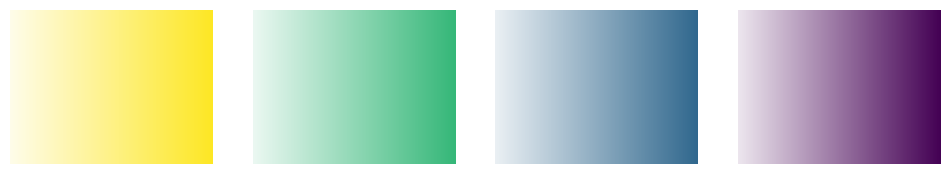

In [2]:
values = np.array([1, 2, 3, 4])
cmap = mpl.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)

# Sample colors from the viridis colormap
colors = cmap(norm(values))

cmaps = []
# Function to create a unicolor colormap with white/blank first, base color, then dark
def create_unicolor_colormap(base_color):
    # Create colors that start from white, transition to the base color, then to dark
    start = np.array([1, 1, 1, 1])  # white color
    end = np.array(base_color) # base color
    light_color = start + (end - start) * 0.1
    new_colors = [light_color * (1 - i) + end * i for i in np.linspace(0, 1, 256)]
    return mpl.colors.LinearSegmentedColormap.from_list("unicolor", new_colors)

for i, color in enumerate(colors[::-1]):
    new_cmap = create_unicolor_colormap(color)
    cmaps.append(new_cmap)

# Example usage: Visualizing the colormaps
fig, axs = plt.subplots(nrows=1, ncols=len(cmaps), figsize=(12, 2))
for ax, cmap in zip(axs, cmaps):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.axis('off')
plt.show()

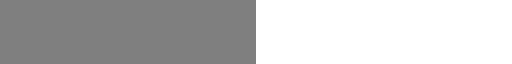

In [3]:
import matplotlib.colors as mcolors
colors = [(0.5, 0.5, 0.5, 1.0), (1.0, 1.0, 1.0, 1.0)]  # Grey and Transparent
cmap_grey = mcolors.ListedColormap(colors)

# Define a normalization that maps True to 1 and False to 0
norm_grey = mcolors.BoundaryNorm(boundaries=[0, 0.5, 1], ncolors=2)
cmap_grey

In [4]:
import os
import pickle

def save_data(file_path, data):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)

def load_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def check_and_create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

## Fig Finale

In [5]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER###
settings_paths = [
# "settings/obs_summer_30d.yaml",
"settings/obs_winter_30d.yaml",

  "settings/arpege_winter_30d.yaml", 
        # "settings/arpege_summer_30d.yaml", 
#   "settings/ifs_winter_30d.yaml" , 
#   "settings/ifs_summer_30d.yaml", 
  
  "settings/mpas_winter_30d.yaml", 
# "settings/mpas_summer_30d.yaml", 

#   "settings/screamv1_winter_30d.yaml",
#   "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
# "settings/sam_summer_30d.yaml", 

#   "settings/um_winter_30d.yaml",
  # "settings/um_summer_30d.yaml",

  # "settings/xshield_winter_30d.yaml" , 
  # "settings/fv3_summer_30d.yaml", 
  
#   "settings/geos_winter_30d.yaml", 
#   "settings/grist_winter_30d.yaml", 
#   "settings/nicam_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


figure size = 15 2.6875
Loading data_layers from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/map_data_layers.pkl.
Bbox(x0=0.45251811594202895, y0=0.7126086956521739, x1=0.5724818840579711, y1=0.88)
Loading data_layers from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/map_data_layers.pkl.
Bbox(x0=0.45251811594202895, y0=0.5117391304347826, x1=0.5724818840579711, y1=0.6791304347826087)
Loading data_layers from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/map_data_layers.pkl.
Bbox(x0=0.452518115942029, y0=0.3108695652173913, x1=0.5724818840579711, y1=0.47826086956521735)
Loading data_layers from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/map_data_layers.pkl.
Bbox(x0=0.45251811594202895, y0=0.10999999999999999, x1=0.5724818840579711, y1=0.2773913043478261)


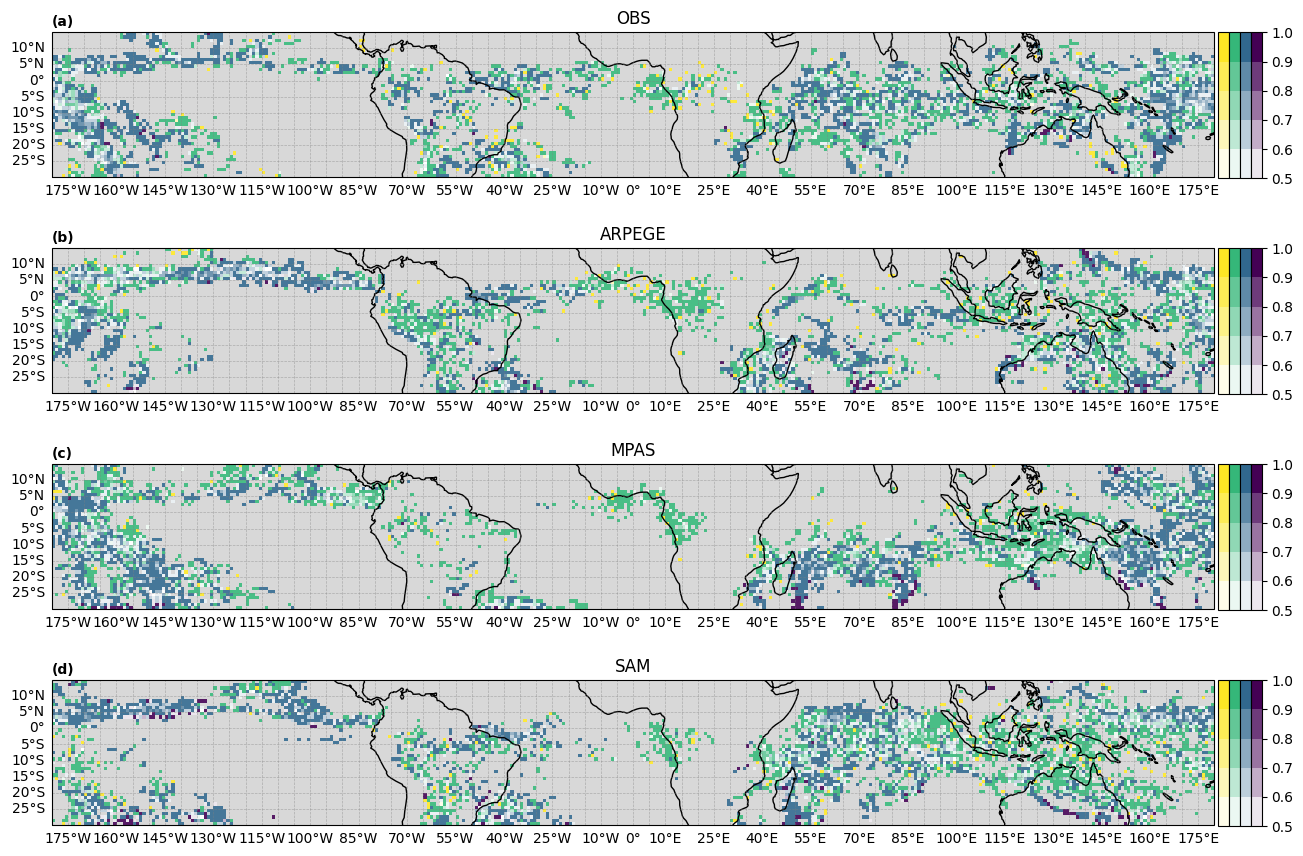

In [6]:
overwrite = False ## datalayers

#### fig 3 maps 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

colormaps = cmaps
# Norms (assuming same boundaries for simplification)
norms = [mpl.colors.BoundaryNorm([0.5, 0.6, 0.7, 0.8, 0.9, 1], colormap.N) for colormap in colormaps]

#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]


for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

# Calculate figure size based on jd grid
dlon = np.diff((jds[0].grid.casestudy.lon_slice.start, jds[0].grid.casestudy.lon_slice.stop))[0] % 360
if dlon == 0: dlon = 360
dlat = np.diff((jds[0].grid.casestudy.lat_slice.start, jds[0].grid.casestudy.lat_slice.stop))[0]
Lx_fig = 15
Lx_cbar = 1.5
Ly_title = 1
Ly_fig = (Lx_fig - Lx_cbar) / dlon * dlat + Ly_title
print('figure size =', Lx_fig, Ly_fig)

# Initialize figure with subplots
fig, axes = plt.subplots(len(jds), 1, figsize=(Lx_fig, Ly_fig * len(jds)), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
letters = ["("+chr(97 + i)+")" for i in range(len(jds))]  

if len(jds) == 1:
    axes = [axes]

for jd, mask_all, ax, letter in zip(jds, mask_alls, axes, letters):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')

    if not overwrite and os.path.exists(data_file):
        print(f"Loading data_layers from {data_file}.")
        data_layers = load_data(data_file)
        mask_no_extremes = load_data(map_no_extremes_file)

    else:
        print(f"Computing data_layers and saving to {data_file}.")
        list_mask_yxt = []
        for mask_ranked, cmap in zip(mask_all, colormaps):
            mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
            list_mask_yxt.append(mask_yxt)
        mask_yxt_stacked = np.stack(list_mask_yxt)
        mask_no_extremes = np.sum(mask_yxt_stacked, axis = (0,-1))!=0
        mask_yxt_stacked = np.sum(mask_yxt_stacked, axis=-1) / np.sum(mask_yxt_stacked, axis=(0, -1)) ## axis 0 is class, last axis is days
        data_layers = [data for data in mask_yxt_stacked]
        for data in data_layers:
            data[data < 0.5] = np.nan

        save_data(data_file, data_layers)
        save_data(map_no_extremes_file, mask_no_extremes)


    lat_1d = jd.get_coord_values('lat')
    lon_1d = jd.get_coord_values('lon')
    lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

    width = 0.06
    height = 0.81
    bottom = 0.092
    left = 3.75
    left_incr = 0.061
    base_cax_positions = [[i, bottom, width, height] for i in [left, left+1*left_incr, left+2*left_incr, left+3*left_incr]]

    # Get the current axis position to adjust the cax positions accordingly
    pos = ax.get_position()
    print(pos)
    cax_positions = []

    for base_pos in base_cax_positions:
        cax_positions.append([
            pos.x0 + base_pos[0] * pos.width,
            1*(pos.y0)+ base_pos[1]* pos.height,
            base_pos[2] * pos.width,
            base_pos[3] * pos.height
        ])

    im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, mask_no_extremes, transform=ccrs.PlateCarree(), alpha=0.3, cmap=cmap_grey, norm=norm_grey)
  
    for i, (data, colormap, norm) in enumerate(zip(data_layers, colormaps, norms)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, data, transform=ccrs.PlateCarree(), alpha=0.9, cmap=colormap, norm=norm)
        cax = fig.add_axes(cax_positions[i])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), cax=cax, ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1], spacing='uniform')
        if i != 3: 
            cb.set_ticks([]) 
    lat_letter = 17 if "Winter" in jd.name else 32
    ax.text(-180, lat_letter, letter, color = 'k', fontweight='bold')
    ax.set_title(jd.name.split("_")[0])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# plt.tight_layout()
# plt.show()